# Data Exploration of 22GB Chinese Breast Cancer DB

The Chinese Mammography (MG) Database was collected from patients in China with benign and malignant breast disease who did mammography examinations between July 2012 and January 2016.

This dataset contains the following characteristics:

- 1775 Number of Patients
- 1775 Number of Studies
- 1775 Number of Series
- 5202 Number of Images
- Images Size is 22.9 GB

Mammography images were collected in .TIFF format and converted to DICOM.

Clinical data is in .XLSX spreadsheet. For rows where both ID1 and ID2 exist, TCIA image database stores ONLY the ID2 value as PatientID.

**Data Citation**

Cui, Chunyan; Li Li; Cai, Hongmin; Fan, Zhihao; Zhang, Ling; Dan, Tingting; Li, Jiao; Wang, Jinghua. (2021) The Chinese Mammography Database (CMMD): An online mammography database with biopsy confirmed types for machine diagnosis of breast. The Cancer Imaging Archive. DOI: https://doi.org/10.7937/tcia.eqde-4b16

**Publication Citation**

Cai, H., Huang, Q., Rong, W., Song, Y., Li, J., Wang, J., Chen, J., & Li, L. (2019). Breast Microcalcification Diagnosis Using Deep Convolutional Neural Network from Digital Mammograms. Computational and Mathematical Methods in Medicine, 2019, 1–10. https://doi.org/10.1155/2019/2717454

Wang, J., Yang, X., Cai, H., Tan, W., Jin, C., & Li, L. (2016). Discrimination of Breast Cancer with Microcalcifications on Mammography by Deep Learning. Scientific Reports, 6(1). https://doi.org/10.1038/srep27327

**TCIA Citation**

Clark, K., Vendt, B., Smith, K., Freymann, J., Kirby, J., Koppel, P., Moore, S., Phillips, S., Maffitt, D., Pringle, M., Tarbox, L., & Prior, F. (2013). The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository. Journal of Digital Imaging, 26(6), 1045–1057. https://doi.org/10.1007/s10278-013-9622-7


In [1]:
import cv2
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt

## Load Breast Cancer Clinical Data Revision

In [3]:
cmmd_table = pd.read_excel("/home/james/Downloads/Jetson_TX2_CMPE258/Chinese_Breast_Cancer_MG_Clinical_CMMD_100Percent/CMMD_clinicaldata_revision.xlsx")
cmmd_table.head(-10)

,ID1,LeftRight,Age,number,abnormality,classification,subtype
0,D1-0001,R,44,2,calcification,Benign,NaN
1,D1-0002,L,40,2,calcification,Benign,NaN
2,D1-0003,L,39,2,calcification,Benign,NaN
3,D1-0004,L,41,2,calcification,Benign,NaN
4,D1-0005,R,42,2,calcification,Benign,NaN
...,...,...,...,...,...,...,...
1857,D2-0735,L,48,2,mass,Malignant,Luminal B
1858,D2-0736,R,48,2,mass,Malignant,Luminal A
1859,D2-0737,R,44,2,mass,Malignant,Luminal B
1860,D2-0738,R,43,2,mass,Malignant,HER2-enriched


## Load Breast Cancer Metadata Table

In [7]:
cmmd_meta_table = pd.read_csv("/home/james/Downloads/Jetson_TX2_CMPE258/Chinese_Breast_Cancer_MG_Clinical_CMMD_100Percent/manifest-1616439774456/metadata.csv")
cmmd_meta_table.head(10)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0003,1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0003/07-18-2011-NA-NA-25491/1.000000...,2022-09-15T17:07:33.288
1,1.3.6.1.4.1.14519.5.2.1.1239.1759.610823649257...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0002,1.3.6.1.4.1.14519.5.2.1.1239.1759.241519791051...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0002/07-18-2010-NA-NA-49231/1.000000...,2022-09-15T17:07:41.45
2,1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0001,1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000...,2022-09-15T17:07:42.655
3,1.3.6.1.4.1.14519.5.2.1.1239.1759.411712488433...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0005,1.3.6.1.4.1.14519.5.2.1.1239.1759.249693111563...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0005/07-18-2011-NA-NA-52347/1.000000...,2022-09-15T17:07:47.106
4,1.3.6.1.4.1.14519.5.2.1.1239.1759.328825651506...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0004,1.3.6.1.4.1.14519.5.2.1.1239.1759.132173027545...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0004/07-18-2011-NA-NA-14914/1.000000...,2022-09-15T17:07:47.109
5,1.3.6.1.4.1.14519.5.2.1.1239.1759.202447815325...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0006,1.3.6.1.4.1.14519.5.2.1.1239.1759.241563313733...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0006/07-18-2010-NA-NA-16802/1.000000...,2022-09-15T17:07:49.361
6,1.3.6.1.4.1.14519.5.2.1.1239.1759.186486081393...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0009,1.3.6.1.4.1.14519.5.2.1.1239.1759.336063878508...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0009/07-18-2010-NA-NA-81159/1.000000...,2022-09-15T17:07:57.164
7,1.3.6.1.4.1.14519.5.2.1.1239.1759.148395128205...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0007,1.3.6.1.4.1.14519.5.2.1.1239.1759.225080655188...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0007/07-18-2010-NA-NA-58107/1.000000...,2022-09-15T17:07:57.221
8,1.3.6.1.4.1.14519.5.2.1.1239.1759.299888293271...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0011,1.3.6.1.4.1.14519.5.2.1.1239.1759.201630080467...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0011/07-18-2010-NA-NA-93954/1.000000...,2022-09-15T17:08:02.883
9,1.3.6.1.4.1.14519.5.2.1.1239.1759.642120288324...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0010,1.3.6.1.4.1.14519.5.2.1.1239.1759.212060565147...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,./CMMD/D1-0010/07-18-2010-NA-NA-56931/1.000000...,2022-09-15T17:08:02.891


## Load MG BreastD1-0001

Let's preview MG dicom  **1-1.dcm** without extracting any info:

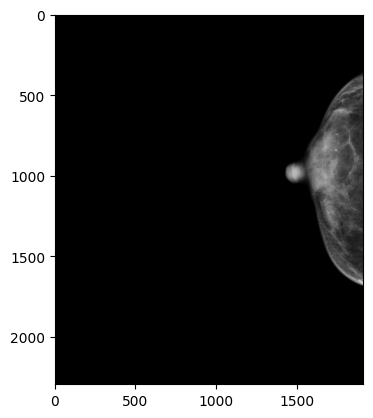

In [5]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Chinese_Breast_Cancer_MG_Clinical_CMMD_100Percent/manifest-1616439774456/CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000-NA-70244/1-1.dcm"
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

## Load MG BreastD1-0051

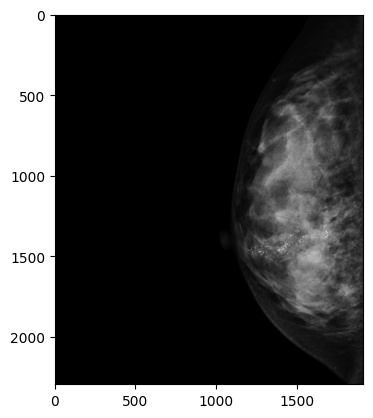

In [10]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Chinese_Breast_Cancer_MG_Clinical_CMMD_100Percent/manifest-1616439774456/CMMD/D1-0051/07-18-2010-NA-NA-81300/1.000000-NA-84975/1-1.dcm"
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

## Load MG BreastD1-0101

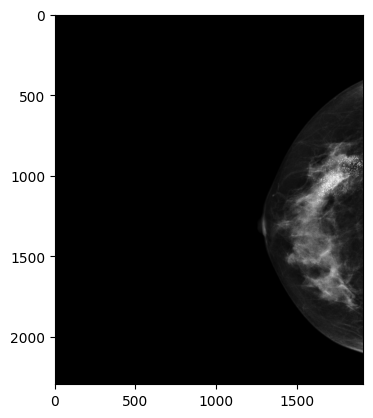

In [11]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Chinese_Breast_Cancer_MG_Clinical_CMMD_100Percent/manifest-1616439774456/CMMD/D1-0101/07-18-2010-NA-NA-36396/1.000000-NA-00552/1-1.dcm"
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)